In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC  # 线性支持向量机

In [2]:
iris = datasets.load_iris()  # 鸢尾花数据集

X = iris.data
y = iris.target

# 选取两个特征和两个类别
X = X[y < 2, :2]
y = y[y < 2]

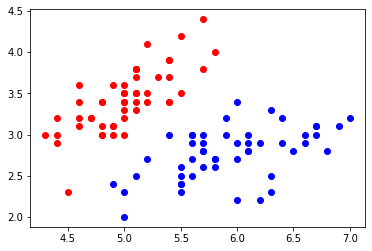

In [3]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue')
plt.show()

In [4]:
standardScaler = StandardScaler()  # 均值方差归一化处理(svm与"距离"有关,最好先进行归一化处理)
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [5]:
svc = LinearSVC(C=1e9)  # C越大,越接近硬间隔最大化
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0)

In [6]:
svc.coef_  # 即w

array([[ 4.03240125, -2.50698369]])

In [7]:
svc.intercept_  # 即b

array([0.92731932])

In [8]:
def plot_svc_decision_boundary(model, axis):
    """绘制决策边界与间隔边界"""
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)

    w = model.coef_[0]
    b = model.intercept_[0]

    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0] / w[1] * plot_x - b / w[1] + 1 / w[1]
    down_y = -w[0] / w[1] * plot_x - b / w[1] - 1 / w[1]  # 间隔边界

    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='red')
    plt.plot(plot_x[down_index], down_y[down_index], color='yellow')

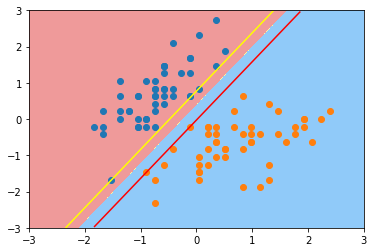

In [9]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y == 0, 0], X_standard[y == 0, 1])
plt.scatter(X_standard[y == 1, 0], X_standard[y == 1, 1])
plt.show()

In [10]:
svc2 = LinearSVC(C=0.1)  # C越小,允许不满足约束的样本越多
svc2.fit(X_standard, y)

LinearSVC(C=0.1)

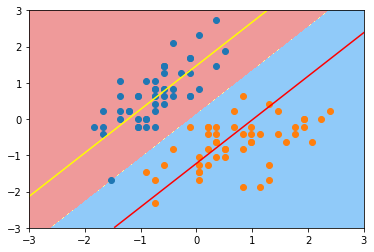

In [11]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y == 0, 0], X_standard[y == 0, 1])
plt.scatter(X_standard[y == 1, 0], X_standard[y == 1, 1])
plt.show()
